TASK 1 - Prediction using Supervised ML

Predicting the percentage of an student based on the no. of study hours.

Author - Neha Bansode

In [68]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [69]:
#Reading the dataset
df = pd.read_csv("Scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [70]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [71]:
df.shape

(25, 2)

<Figure size 800x600 with 0 Axes>

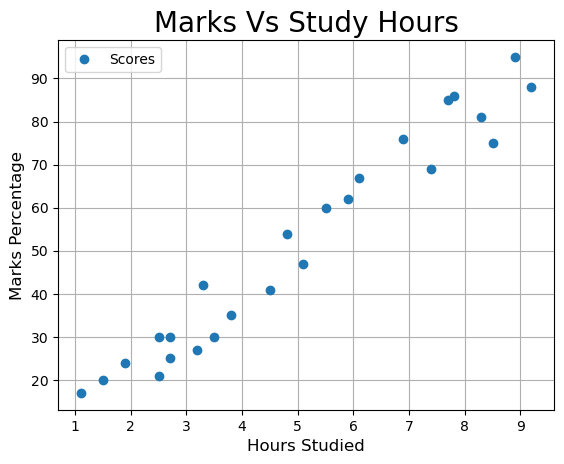

In [72]:
#Correlation between marks and study hours
plt.figure(figsize=(8, 6))
df.plot(x='Hours', y='Scores', style='o')
plt.title('Marks Vs Study Hours', size=20)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Marks Percentage', size=12)
plt.grid(True)
plt.show()

In [73]:
# Calculate regression line
m, b = np.polyfit(df['Hours'], df['Scores'], 1)

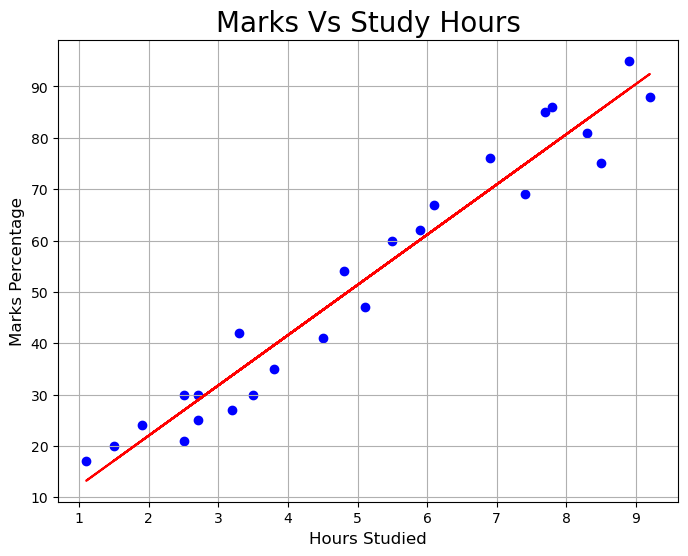

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [74]:
#plotting the regression line to confirm the correlation
plt.figure(figsize=(8, 6))
plt.plot(df['Hours'], m * df['Hours'] + b, color='red')
plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.title('Marks Vs Study Hours', size=20)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Marks Percentage', size=12)
plt.grid(True)
plt.show()
print(df.corr())

In [ ]:
Training the data

In [75]:
#Defining x and y
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Spliting the Data in two
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

In [76]:
from sklearn.linear_model import LinearRegression
regres = LinearRegression()
regres.fit(x_train, y_train)

print("Training complete.")

Training complete.


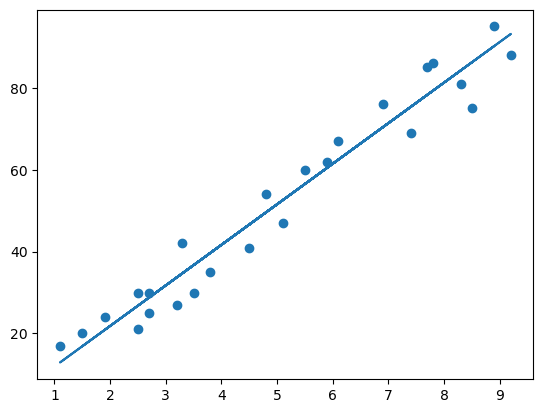

In [77]:
# Plotting the regression line
line = regres.coef_*x+regres.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [78]:
print(x_test) # Testing data - In Hours
y_pred = regres.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [79]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


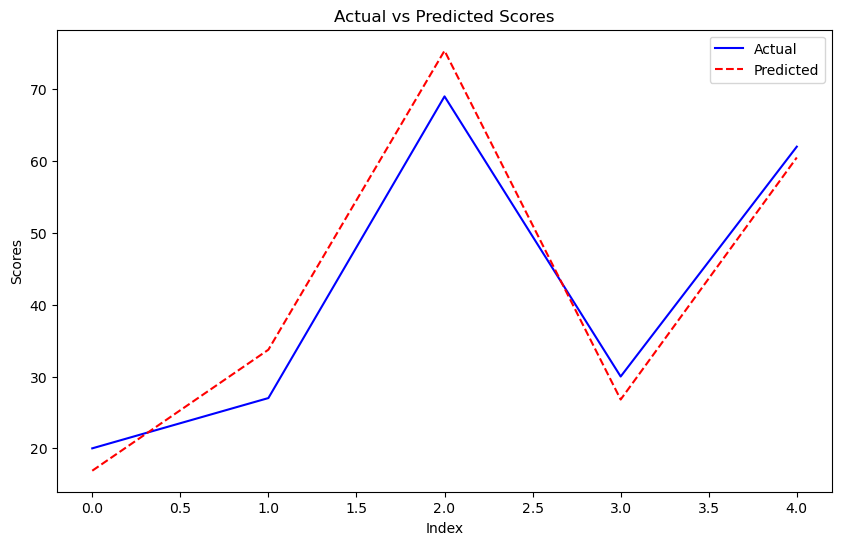

In [80]:
# Plotting actual vs predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [81]:
# Predicting the score for 9.25 hours
new_hours = 9.25
predicted_score = regres.predict([[new_hours]])
print("Predicted score for 9.25 hours/day:", predicted_score[0])

Predicted score for 9.25 hours/day: 93.69173248737538


In [82]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 4.183859899002975
